In [23]:
from math import sqrt
from scipy import stats
from pydataset import data
from datetime import datetime
import warnings
warnings.filterwarnings('ignore')


from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import MinMaxScaler, RobustScaler, StandardScaler
import sklearn.metrics

%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from env import host, user, password, sql_connect
from wrangle import wrangle_telco, wrangle_zillow

## Regression: Scaling Exercises
    - Do your work for these exercises in a jupyter notebook named scaling. Use the telco dataset you acquired and prepped in previous lesson. Once you are finished, you may wish to repeat the exercises on another dataset for additional practice

#### Question 1:  Apply the scalers we talked about in this lesson to your data and visualize the results for the unscaled and scaled distribution .

In [7]:
##acquring the data with the wrangle function

telco_df = wrangle_telco()
telco_df.head()

,customer_id,monthly_charges,tenure,total_charges
0,0013-SMEOE,109.70,71,7904.25
1,0014-BMAQU,84.65,63,5377.80
2,0016-QLJIS,90.45,65,5957.90
3,0017-DINOC,45.20,54,2460.55
4,0017-IUDMW,116.80,72,8456.75


In [11]:
## splitting the data for scaling and late modeling purposes

train_validate, test = train_test_split(telco_df, test_size=.2, 
                                        random_state=123
                                        )
train, validate = train_test_split(train_validate, test_size=.3, 
                                   random_state=123
                                   )

In [12]:
## displaying shapes of split data to make sure it returns the norm

train.shape, validate.shape, test.shape

((949, 4), (407, 4), (339, 4))

In [28]:
## graphing distributions function
def graph_distributions(df):

    cols = ['total_charges', 'tenure', 'monthly_charges', 'total_charges_minmax',
            'monthly_charges_scaled', 'tenure_scaled']
    
    for col in df[cols]:
        plt.hist(df[col])
        plt.title(f'Distribution of {col}')
        plt.ylabel('Number of Customers')
        plt.xlabel(f'{col}: values')
        plt.show()

In [25]:
scaler_tip = MinMaxScaler()  

scaler_tip.fit(train[['total_charges']])
scaler_tip.fit(train[['monthly_charges']])
scaler_tip.fit(train[['tenure']])

MinMaxScaler()

In [26]:
## applying new column with min max scaled data for target variable


train['total_charges_minmax'] = scaler_tip.transform(train[['total_charges']])
train['monthly_charges_scaled'] = scaler_tip.transform(train[['monthly_charges']])
train['tenure_scaled'] = scaler_tip.transform(train[['tenure']])


train.head()

,customer_id,monthly_charges,tenure,total_charges,total_charges_minmax,monthly_charges_scaled,tenure_scaled
1256,7501-IWUNG,73.80,61,4616.05,64.111806,1.025000,0.847222
225,1303-SRDOK,69.05,55,3842.60,53.369444,0.959028,0.763889
662,3967-VQOGC,24.90,67,1680.25,23.336806,0.345833,0.930556
628,3777-XROBG,19.55,58,1079.65,14.995139,0.271528,0.805556
824,5075-JSDKI,24.45,59,1493.10,20.737500,0.339583,0.819444


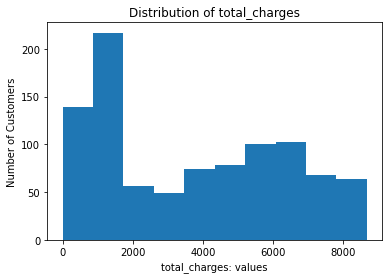

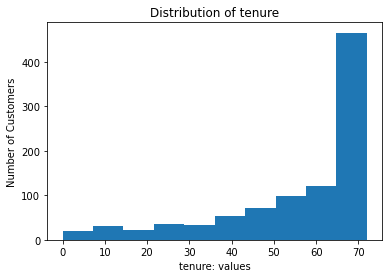

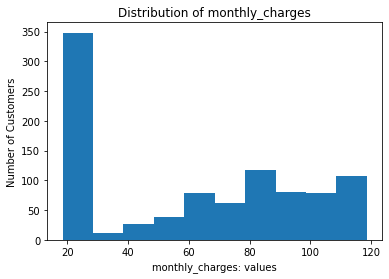

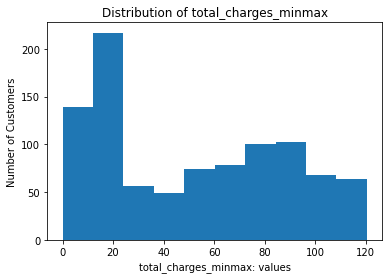

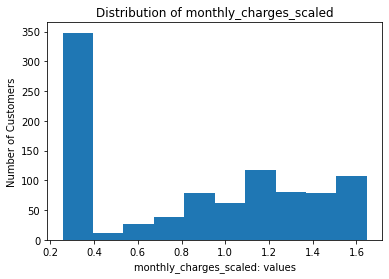

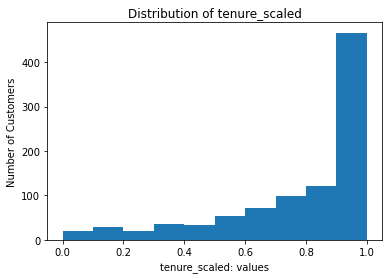

In [29]:
graph_distributions(train)

## we can see when scaling the data the distributions/shape remain the same 
## but the values are different

#### Question 2: Apply the .inverse_transform method to your scaled data. Is the resulting dataset the exact same as the original data?